# **DATASET INFORMATION**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Feature

- **age**(integer): Age of the client.
- **job**(categorical): Type of job of the client.
- **marital**(categorical): Marital status of the client.
- **education**(categorical): Highest education level attained.
- **default**(binary: 'yes'/'no'): Indicates whether the client has credit in default.
- **balance**(integer): Average yearly balance of the client (in euros).
- **housing**(binary: 'yes'/'no'): Indicates whether the client has a housing loan.
- **loan**(binary: 'yes'/'no'): Indicates whether the client has a personal loan.
- **contact**(categorical): Type of communication used in the last contact.
- **day**(Date): Day of the month when the last contact was made.
- **month**(Date): Month when the last contact was made.
- **duration**: (integer): Duration of the last call (in seconds). This feature has a strong influence on the target but should not be used for realistic predictive modeling because it is only known after the call is completed..
- **campaign**(integer): Total number of contacts performed during this campaign with the client.
- **pdays**: (integer): Number of days since the client was last contacted in a previous campaign (-1 means the client was not previously contacted).
- **previous**(integer): Total number of contacts prior to the current campaign.
- **poutcome**(categorical): Outcome of the previous marketing campaign.
- **y**(binary: 'yes'/'no'): Target variable indicating whether the client subscribed to a term deposit.

# Library

At this stage, all the necessary Python libraries are imported for data analysis.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

At this stage, the dataset is loaded into the notebook to begin the data exploration process before performing cleaning and preprocessing. The steps include understanding the structure of the data, ensuring the dataset follows the required reference format, and loading the dataset into the notebook using the `read_csv()` function. After loading, the dataset are displayed using the `df` function to get an initial overview of the dataset.

In [12]:
df = pd.read_csv('../data/bank-full.csv', sep=';')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Dataset Info

In this stage of Exploratory Data Analysis (EDA), several steps are performed to better understand the dataset and prepare it for cleaning. The `info()` function is used to display the structure of the dataset, including the total number of entries, column names, and data types, which helps identify potential inconsistencies or missing values.




In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Describe

The `describe()` function provides a statistical summary of numerical features, such as mean, standard deviation, minimum, and maximum values, offering insights into the data distribution.

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Handling Unknown Values

his code replaces all occurrences of `'unknown`' and `'Unknown`' with `'NaN`' so they can be treated as missing values. The final line checks how many missing values exist in each column.

In [15]:
df = df.replace('unknown', np.nan)
df = df.replace('Unknown', np.nan)

df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

# Checking the Distribution of Target Labels

This code prints the number of occurrences for each class in the target column y (yes/no). It helps identify class imbalance in the dataset

In [16]:
print("Jumlah label 'y' (yes/no):")
display(df['y'].value_counts())

Jumlah label 'y' (yes/no):


y
no     39922
yes     5289
Name: count, dtype: int64

# Separating Numerical and Categorical Features

This code identifies which columns in the dataset are numerical (int64, float64) and which are categorical (object, category). The result is stored as two lists (numeric_cols and cat_cols) to simplify further preprocessing.

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Correlation Between Features

The code  is used to create and display a correlation matrix heatmap for numerical features.

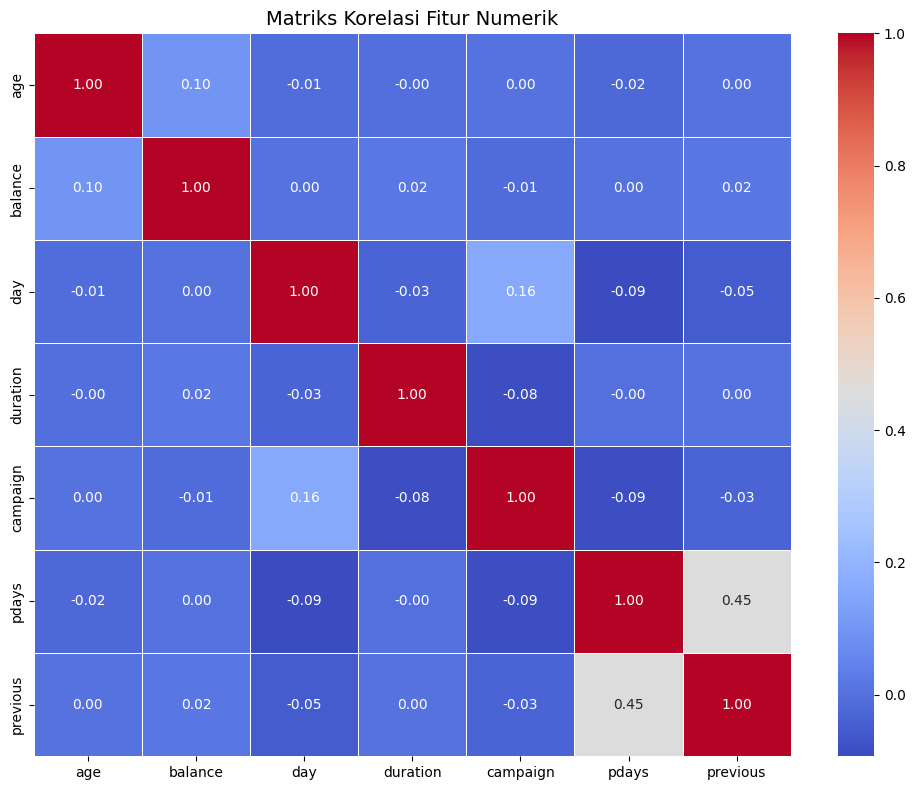

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

# Histogram

In this stage, histogram visualizations are generated to explore the distribution of both numerical and categorical features in the dataset. Numerical columns are identified using `select_dtypes()` and plotted using the `hist()` function to observe data spread, skewness, and potential outliers across each variable. Meanwhile, categorical columns are analyzed using bar charts created from `value_counts()`, displaying the top 10 most frequent categories for better clarity. These visualizations, complemented with descriptive titles and labeled axes, provide valuable insights into the overall data distribution, highlight class imbalances, and help identify dominant values within categorical features, serving as an essential step before proceeding to data preprocessing and model development.



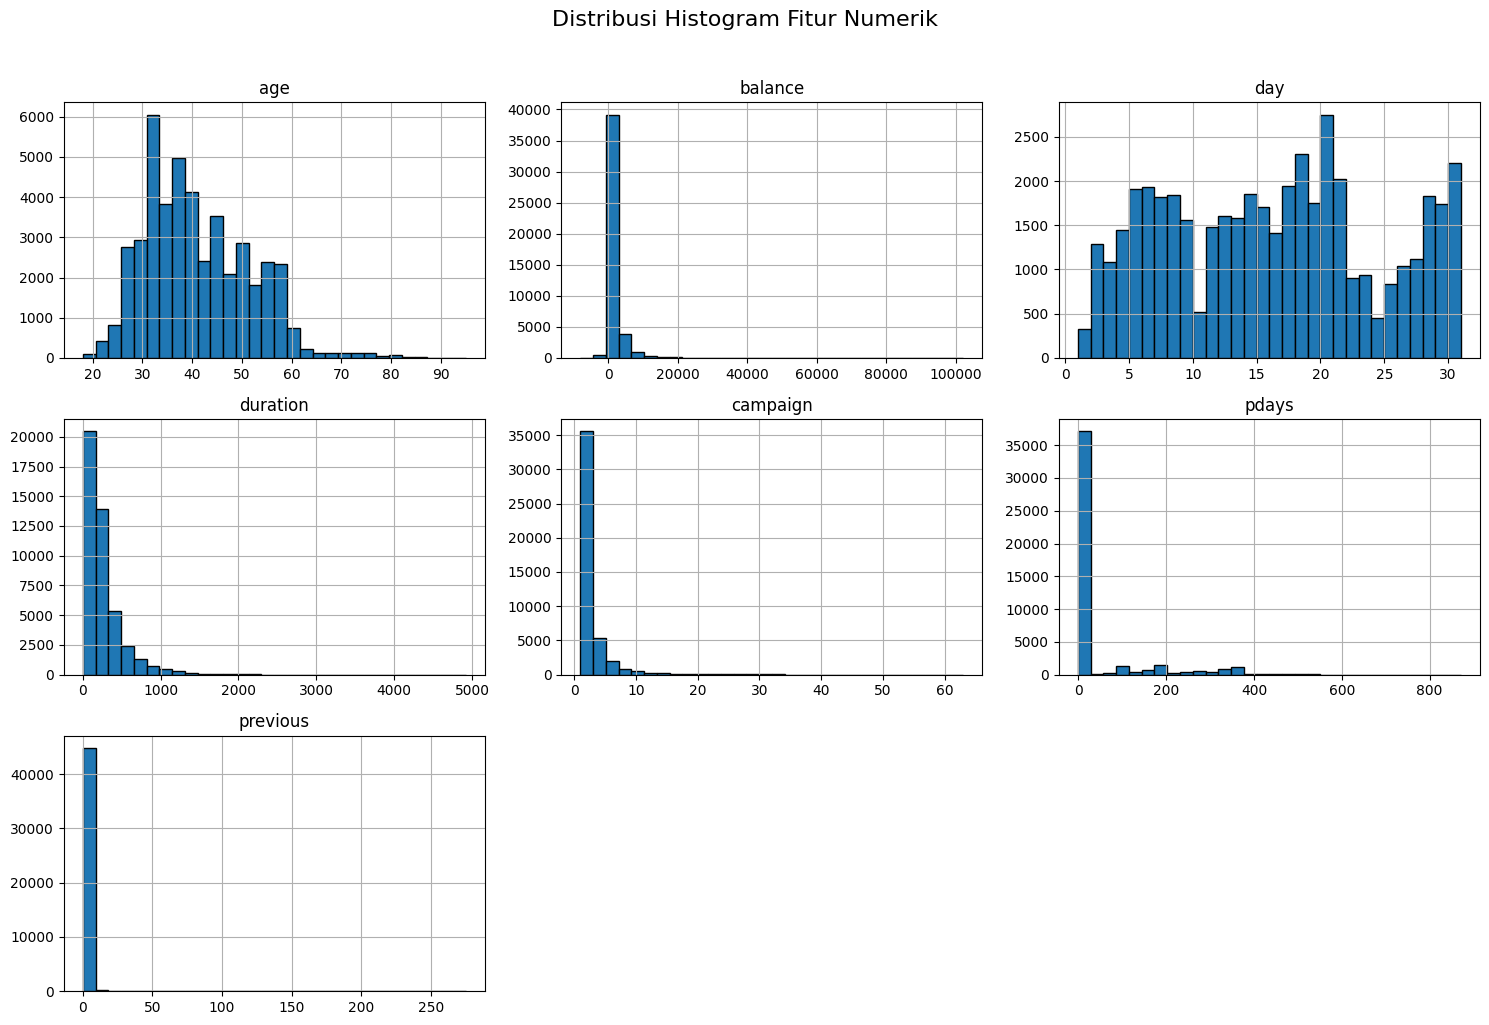

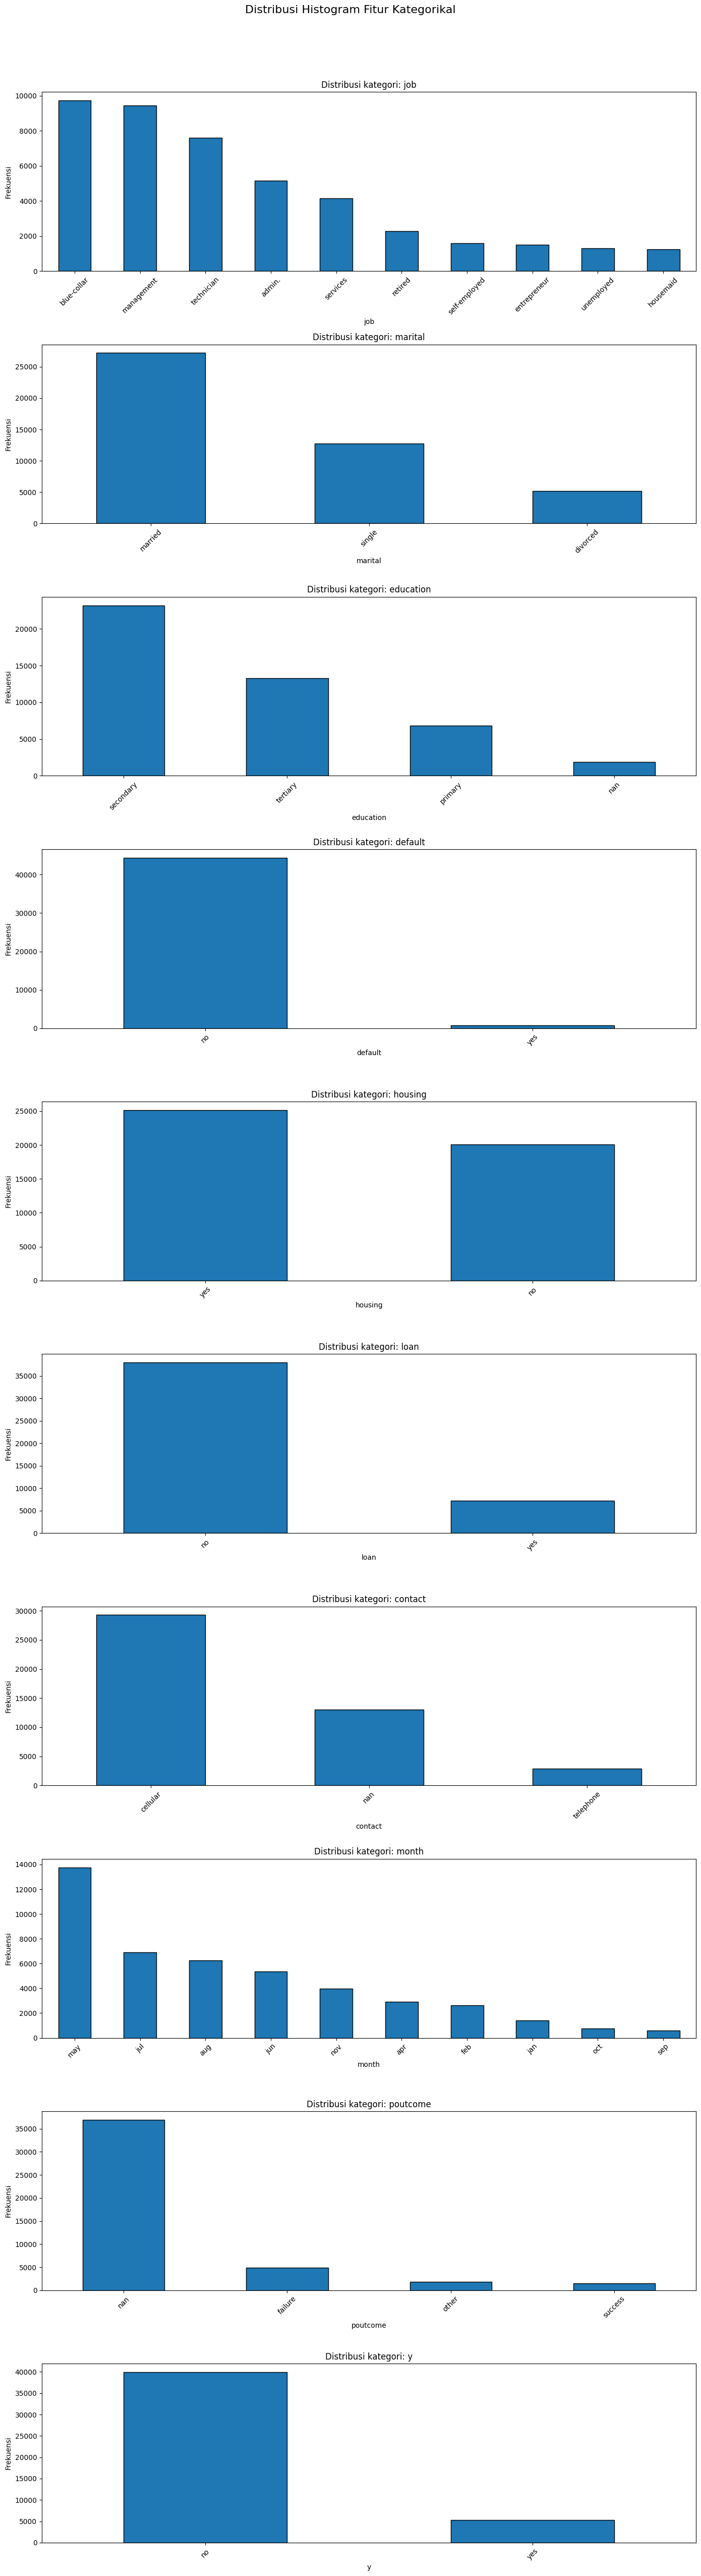

In [19]:
if numeric_cols:
    df[numeric_cols].hist(figsize=(15, 10),bins=30,edgecolor='black')
    plt.suptitle("Distribusi Histogram Fitur Numerik", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

if cat_cols:
    fig, axes = plt.subplots(len(cat_cols), 1, figsize=(14, 5 * len(cat_cols)))
    if len(cat_cols) == 1:
        axes = [axes]

    for ax, col in zip(axes, cat_cols):
        (df[col].value_counts(dropna=False)
                 .head(10)
                 .plot(kind='bar', ax=ax, edgecolor='black'))
        ax.set_title(f"Distribusi kategori: {col}", fontsize=12)
        ax.set_ylabel("Frekuensi")
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)

    fig.suptitle("Distribusi Histogram Fitur Kategorikal", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Pairplot

Pairplot visualization is created to examine the relationships and distribution patterns among numerical features in the dataset. Using Seaborn’s `pairplot()` function, scatter plots are generated for every pair of numerical variables, while the diagonal displays the kernel density estimation (KDE) of each feature to illustrate its distribution. This visualization helps identify potential correlations, linear or nonlinear relationships, and clusters among features, providing deeper insights into the structure of the data. The pairplot serves as an effective exploratory tool to detect feature interactions and patterns that may influence the machine learning model’s performance.

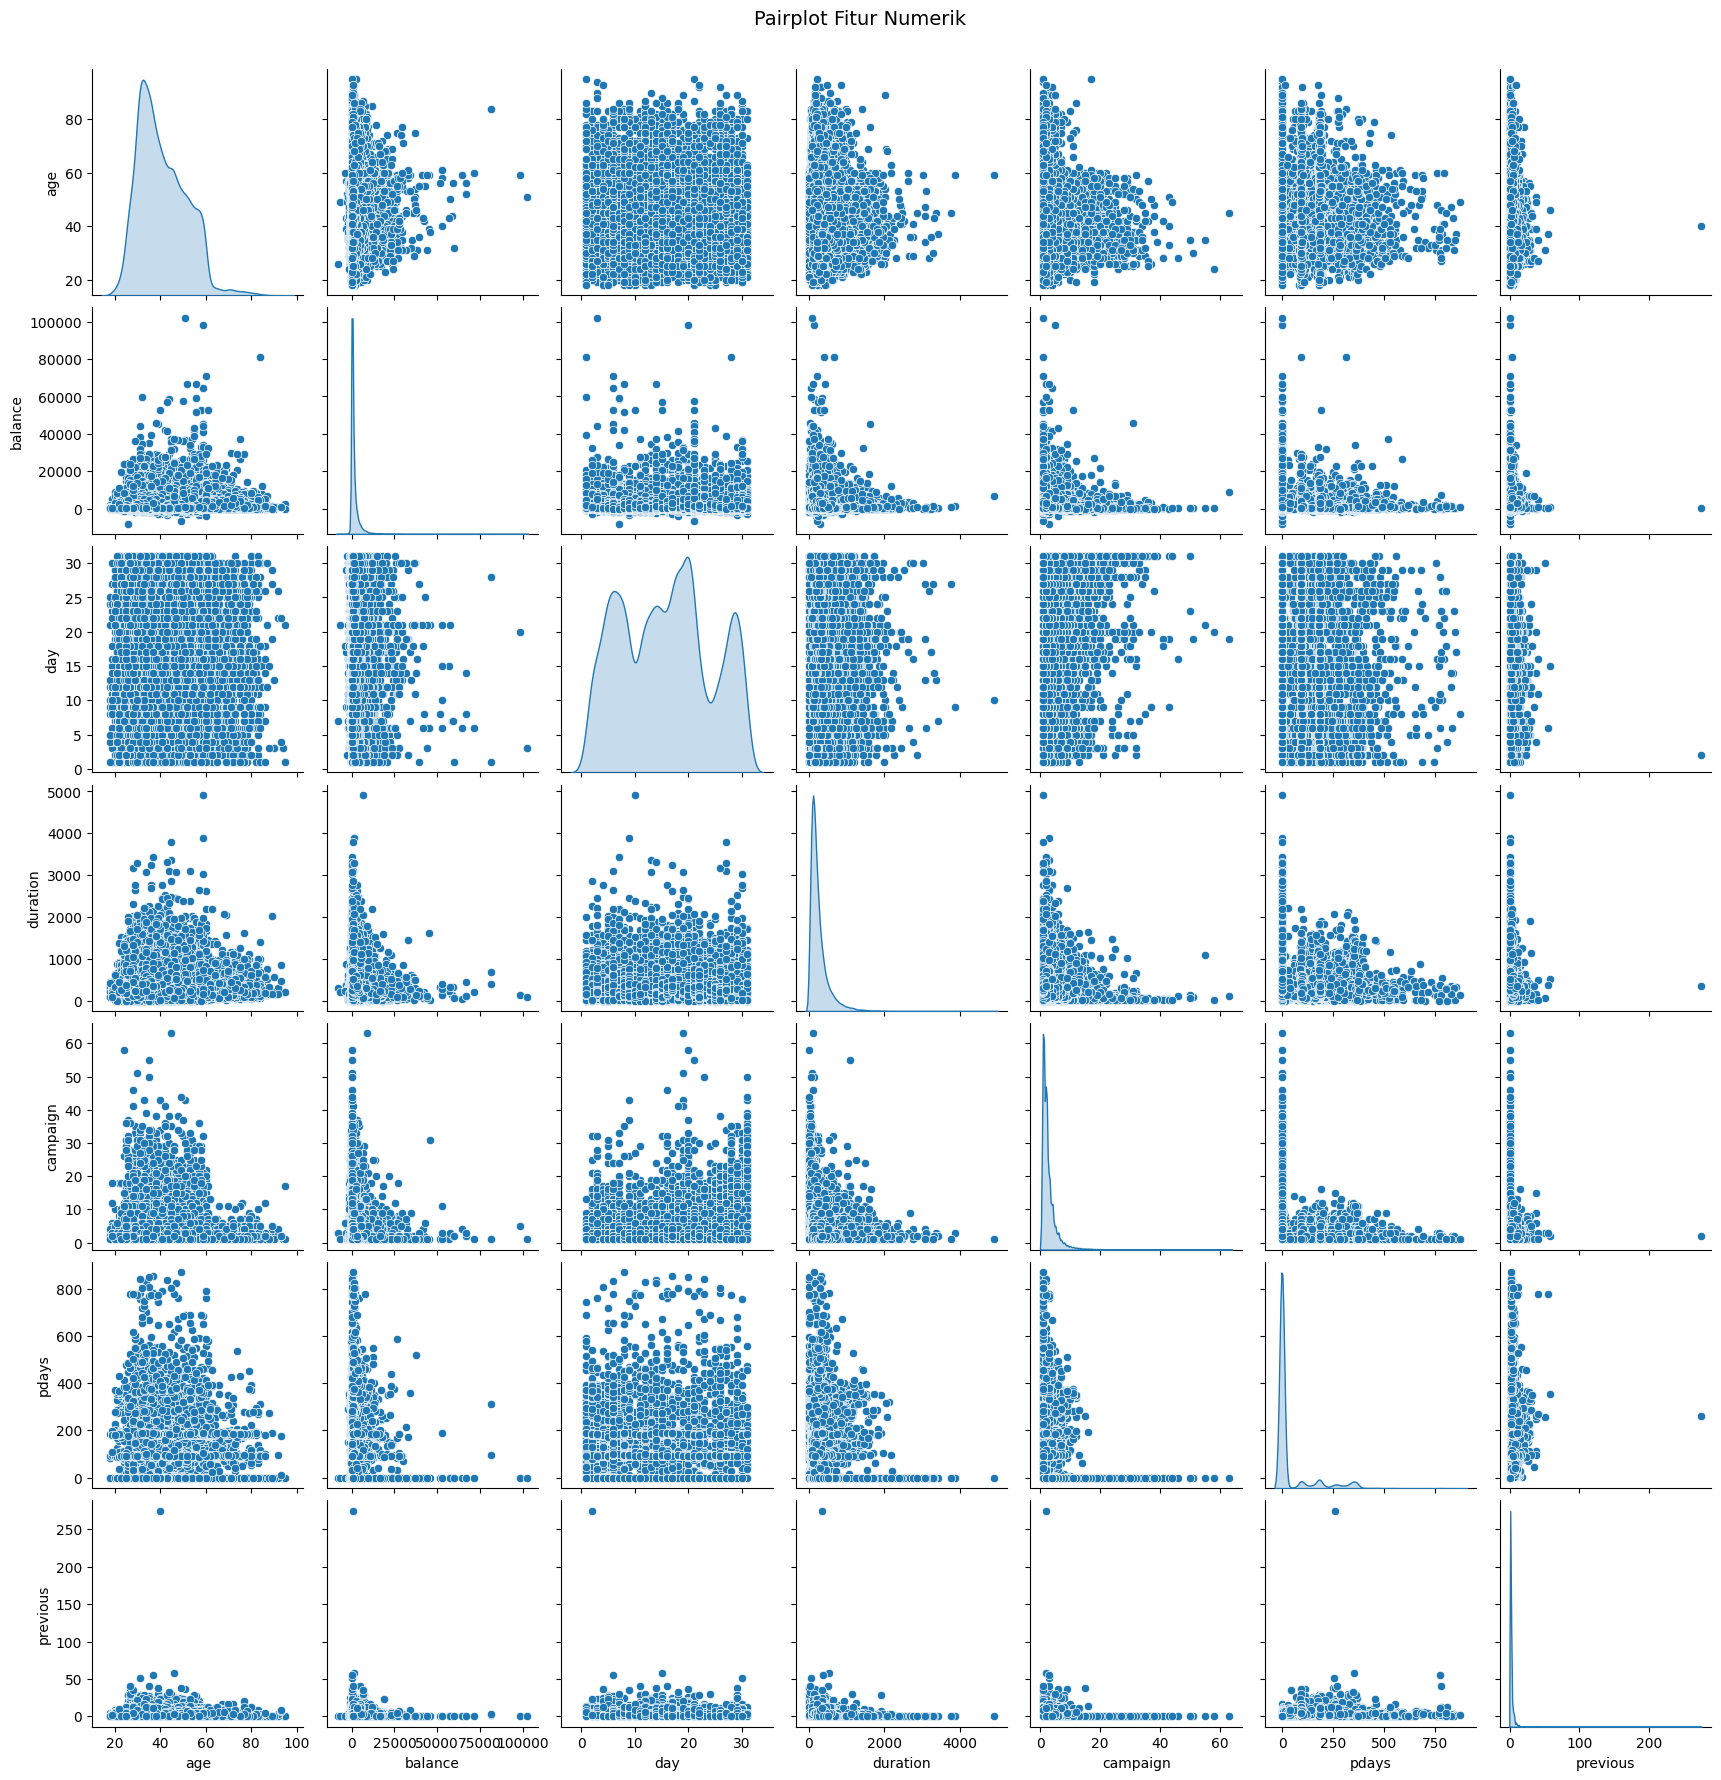

In [20]:
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.suptitle("Pairplot Fitur Numerik", y=1.02, fontsize=14)
plt.show()